In [6]:
# Agents Exchange
""" Returrning back to the MoneyAgent the actual exchange process is now going to be created.
Background: This is where the agent's behavior as it relates to each step or tick of the model is defined 
Model- specific information : In this case, the agent will check its wealth, and if it has money, give one unit
of it away to another random agent.
"""
import mesa 
import seaborn as sns
import numpy as np
import pandas as pd
class MoneyAgent(mesa.Agent):
    # An agent with fixed initial wealth.
    def __init__(self,model):
        super().__init__(model)
        self.wealth = 1
    def exchange(self):
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1

class MoneyModel (mesa.Model):
    # A model with some number of agents.
    def __init__ (self,n):
        super().__init__()
        self.num_agents = n
        # creating agents
        MoneyAgent.create_agents(model= self,n=n)

    def step(self):
        self.agents.shuffle_do("exchange")
        

In [7]:
model = MoneyModel(10)
for _ in range(
    30
):
    model.step()

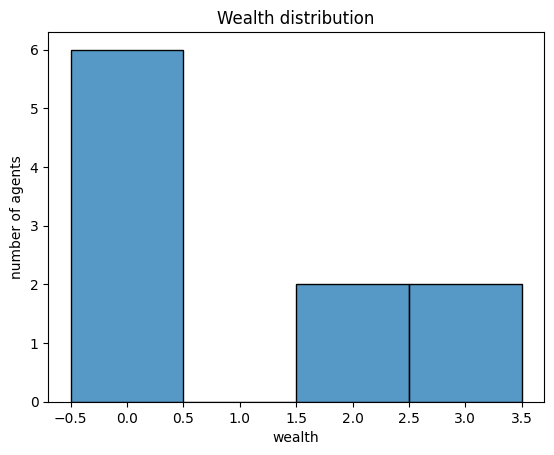

In [13]:
agent_wealth = [a.wealth for a in model.agents]

# creating a histogram with seaborn
g = sns.histplot(agent_wealth,discrete= True)
g.set(
    title = "Wealth distribution", xlabel = "wealth" , ylabel= "number of agents"
);

[Text(0.5, 1.0, 'Wealth distribution'),
 Text(0.5, 0, 'wealth'),
 Text(0, 0.5, 'number of agents')]

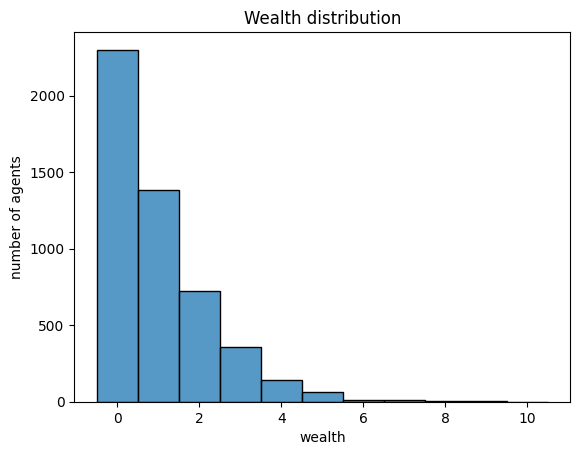

In [9]:
all_wealth = []
#  This will run the model 100 times , each model executing 10 steps
for _ in range(200):
    # Run the model
    model = MoneyModel(25)
    for _ in range(10):
        model.step()

    for agent in model.agents:
        all_wealth.append(agent.wealth)
# Using the seaborn
g = sns.histplot(all_wealth,discrete = True)
g.set(title = "Wealth distribution" , xlabel = "wealth", ylabel = "number of agents")


In [20]:

class MoneyAgent(mesa.Agent):
    def __init__(self,model):
        super().__init__(model)
        self.wealth = 1
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center = False)
        
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self,new_position)
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        cellmates.pop(cellmates.index(self))
        if len(cellmates) > 0:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

class MoneyModel(mesa.Model):
    
    def __init__(self,n,width,height,seed = None):
        super().__init__(seed = seed)
        self.num_agents = n
        self.grid = mesa.space.MultiGrid(width,height,True)

        # Creating agents
        agents = MoneyAgent.create_agents(model = self,n=n)
        # Creating x and y positions for agents 
        x = self.rng.randint(0,self.grid.width, size(n,))
        y = self.rng.randint(0,self.grid.height, size(n,))
        for a, i, j in zip(agents, x, y):
            # Adding the agents to a random grid cell
            self.grid.place_agent(a,(i,j))
    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [16]:
neighbors = []
x,y = self.pos
for dx in [-1,0,1]:
    for dy in [-1,0,1]:
        neighbors.append((x+dx,y+dy))

NameError: name 'self' is not defined

In [21]:
model = MoneyModel(100,10,10)
for _ in range(20):
    model.step()
    

AttributeError: 'numpy.random._generator.Generator' object has no attribute 'randint'

In [18]:
agent_counts = np.zeros((model.grid.width,model.grid.height))
for cell_content, (x,y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

# Plot using seaborn, with a visual size of 5*5
g = sns.heatmap(agent_counts, cmap= "viridis", annot = True, cbar = False, square= True)
g.figure.set_size_inches(5,5)
g.set(title= "number of agents on each cell of the grid");

AttributeError: 'MoneyModel' object has no attribute 'grid'